In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions
tfm = tf.math

%load_ext autoreload
%autoreload 2

In [2]:
# import library functions from repo
import sys, os
sys.path.append('../')

# Prepare Toy Data

In [3]:
# Number of datapoints to generate
N = 3000

In [4]:
# Generate Data
from data import gen_checkerboard as gen_data
data = gen_data(batch_size=N)

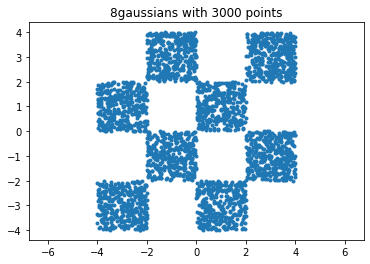

In [5]:
# Inspect the data
plt.plot(data[:, 0], data[:, 1], '.')
plt.axis('equal')
plt.title(f'8gaussians with {N} points')
plt.show()

In [6]:
# Convert the data to a TF dataset
from data import to_tf_dataset
batch_size = 500
dataset = to_tf_dataset(data, batch_size)

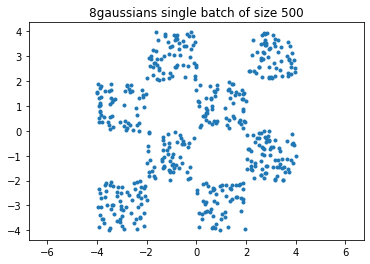

In [7]:
# Plot a single batch of this dataset
single_batch = list(dataset)[0]
plt.plot(single_batch[:, 0], single_batch[:, 1], '.')
plt.axis('equal')
plt.title(f'8gaussians single batch of size {batch_size}')
plt.show()

# Initialize Model

In [8]:
K = 8 # Number of clusters
M = 2 # Number of dimensions

In [9]:
# init model
from models import CPGaussian
model = CPGaussian(K, M)

# use Adam optimizer
optimizer = tf.keras.optimizers.Adam(lr=1e-3)

In [10]:
# Initialize means and cov
from sklearn.cluster import KMeans
covs = np.sqrt(np.full((K, M),np.diag(np.cov(data, rowvar = False)))).astype(np.float32)
kmeans = KMeans(n_clusters=K, random_state=0).fit(data)
centroids = kmeans.cluster_centers_
model.initialize(centroids, covs)
# model.trainable_variables

# Fit model to the data

In [11]:
# Number of epochs to run the loop
epochs = 1000

In [12]:
# Fit the model
losses = []
for epoch in range(epochs):
    for data in dataset:
        model.train_step(data, optimizer)
    log_likelihoods = model(data)
    loss = -np.mean(log_likelihoods)
    losses.append(loss)
    if epoch % 20 == 0:
      print("{}/{} mean neg log likelihood: {}".format(epoch+1, epochs, loss))

1/1000 mean neg log likelihood: 4.702557563781738
21/1000 mean neg log likelihood: 4.6262526512146
41/1000 mean neg log likelihood: 4.567852973937988
61/1000 mean neg log likelihood: 4.545041561126709
81/1000 mean neg log likelihood: 4.498693466186523
101/1000 mean neg log likelihood: 4.460900783538818
121/1000 mean neg log likelihood: 4.470727443695068
141/1000 mean neg log likelihood: 4.396792888641357
161/1000 mean neg log likelihood: 4.348978519439697
181/1000 mean neg log likelihood: 4.289857864379883
201/1000 mean neg log likelihood: 4.178005695343018
221/1000 mean neg log likelihood: 4.072687149047852
241/1000 mean neg log likelihood: 3.952765703201294
261/1000 mean neg log likelihood: 3.8981757164001465
281/1000 mean neg log likelihood: 3.834052801132202
301/1000 mean neg log likelihood: 3.8403987884521484
321/1000 mean neg log likelihood: 3.8032689094543457
341/1000 mean neg log likelihood: 3.799079656600952
361/1000 mean neg log likelihood: 3.7968132495880127
381/1000 mean ne

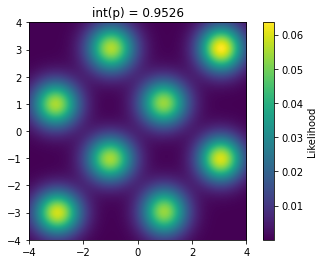

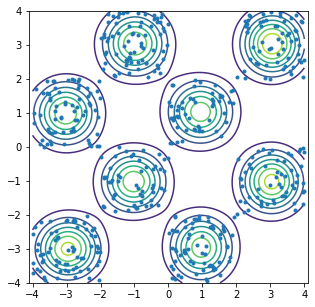

In [15]:
from utils import plot_density, plot_contours
n_points = 1000
limits = 4
plot_density(model, limits, n_points)
plot_contours(data, model, limits, n_points)